In [1]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft
from uncertainties import wrap

In [2]:
with open('Data/Aufg_5.4.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
for i in range(len(data[1])):
    data[0][i]-= 729900


data = f.channel_to_pos(data,cal)
with open('Data/counts.txt','r') as tf:
    counts = np.genfromtxt(tf).T

In [3]:
xerr = 0.005
data[1] = data[1]*10
yerr = 0.035339825186025027*np.abs(data[1])

von 4.255
bis 5.868

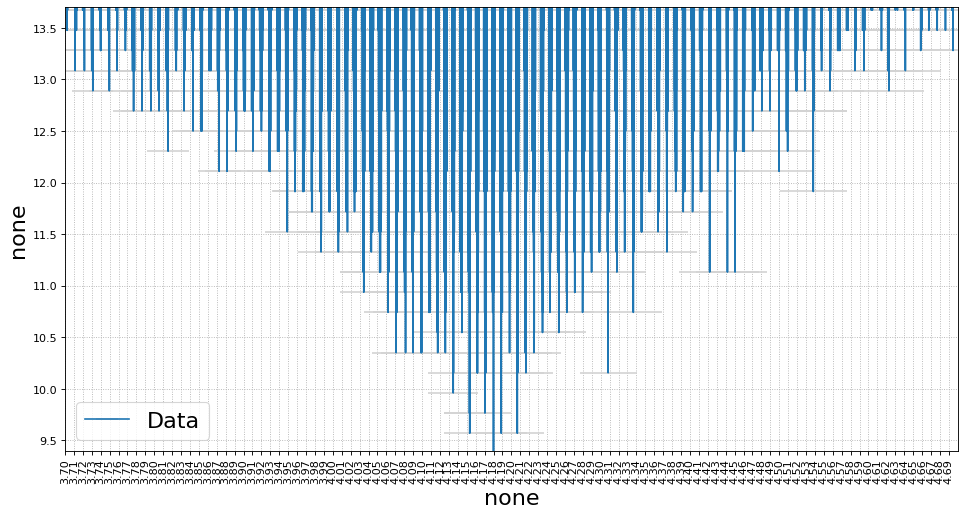

0.030193000793083763


In [4]:
f.figsize(2)
#fig = plt.figure(figsize=(24,9),dpi=100,linewidth=50)
plt.errorbar(data[0],data[1],xerr=data[2],label = 'Data',ecolor='lightgray')
plt.xticks(np.arange(3.7,4.7,0.01),rotation = 90)
plt.ylim(9.4,13.7)
f.form([3.7,4.7])

print(np.mean(np.abs(data[2])))

In [5]:
def lam(von,bis,peaks):
    dist = (((ufloat(bis,0.005)-ufloat(von,0.005))*10**-3)*2)/5.127868608985219
    return dist/peaks


In [11]:

lengths = []
for i in range(len(counts[0])):
    lengths.append(lam(counts[0,i],counts[1,i],counts[2,i]))

print(sum(lengths)/len(lengths))
print((sum(lengths)/len(lengths))/3.31e-6)

(3.664+/-0.033)e-06
1.107+/-0.010
